Linear Regression - Mean Squared Error: 986869414953.9843, R-squared: 0.03233518995632101
Decision Tree - Mean Squared Error: 1043629666634.56, R-squared: -0.023320499974121223
Random Forest - Mean Squared Error: 994053430717.689, R-squared: 0.02529097605730135
Gradient Boosting - Mean Squared Error: 991881986753.6554, R-squared: 0.027420163444342838


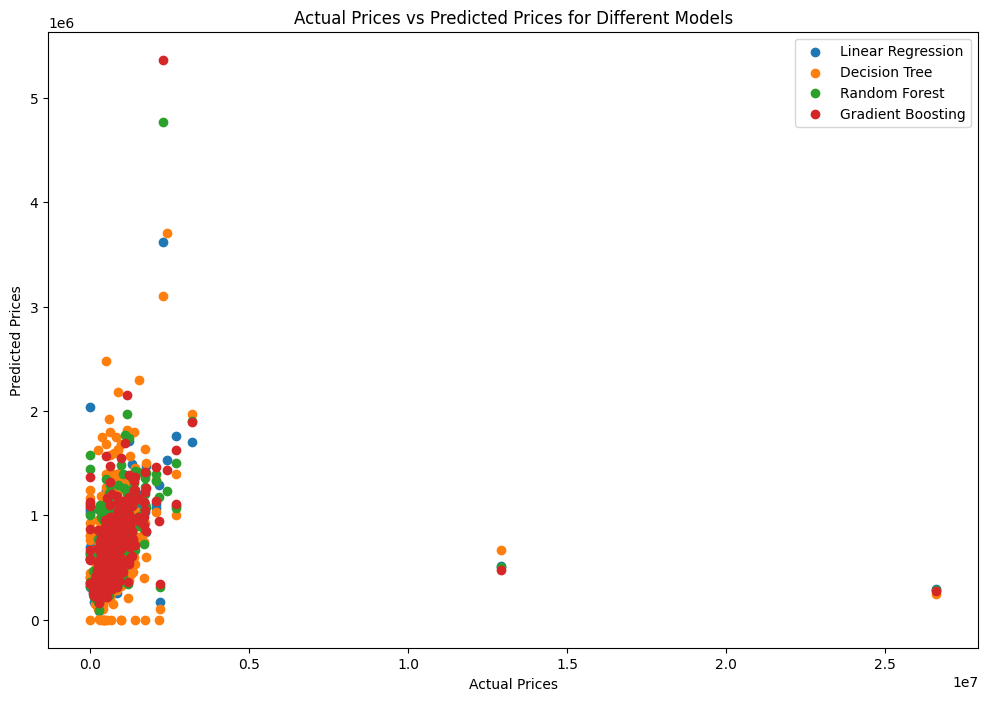

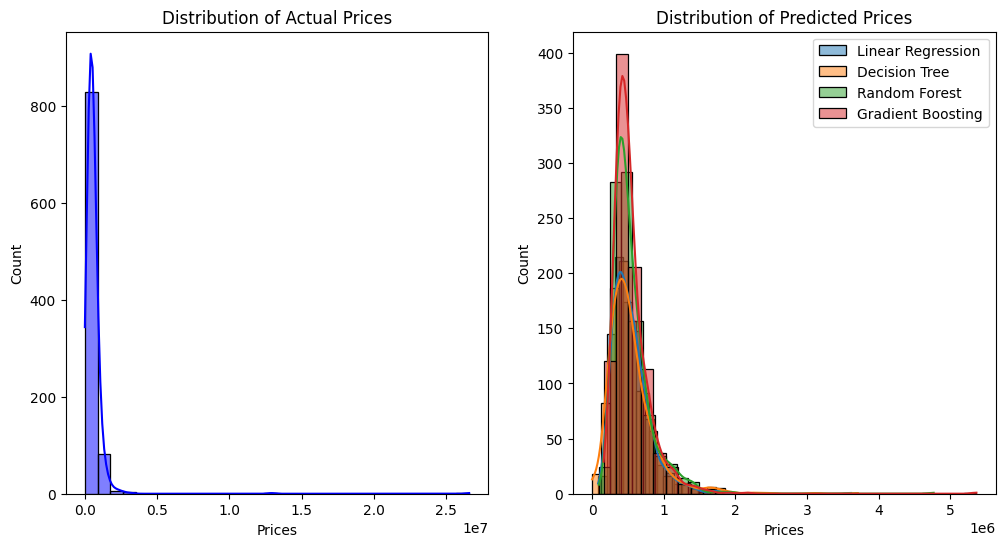

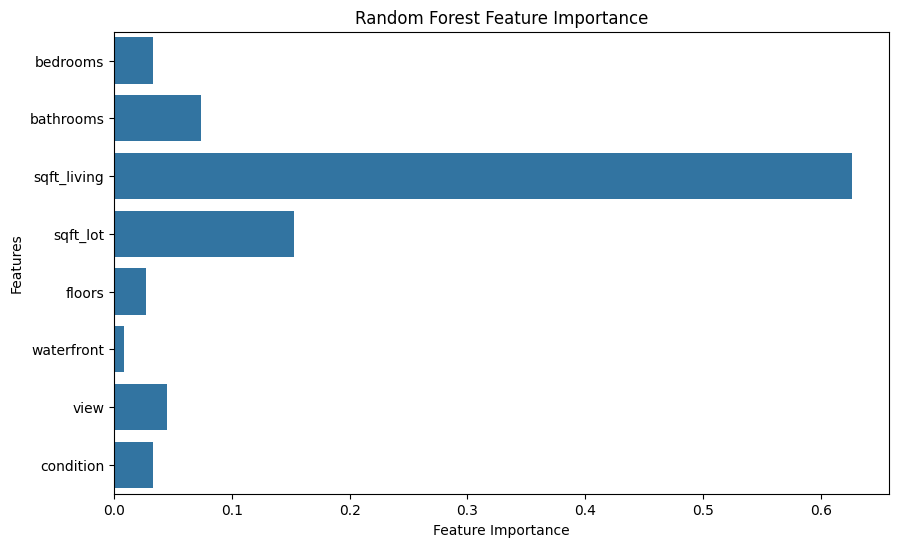

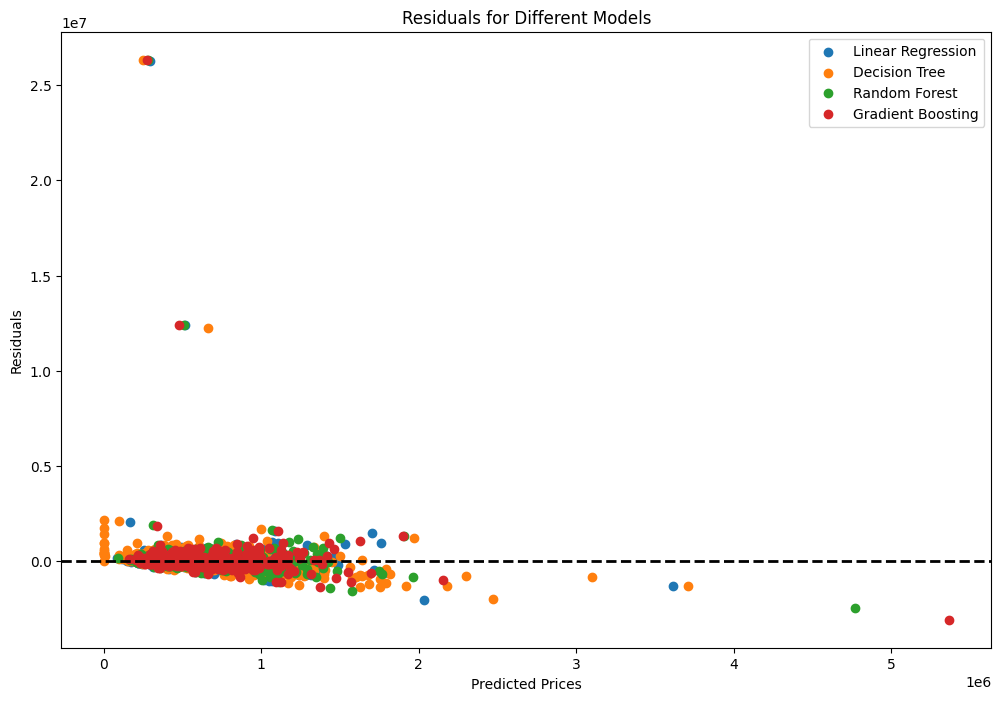

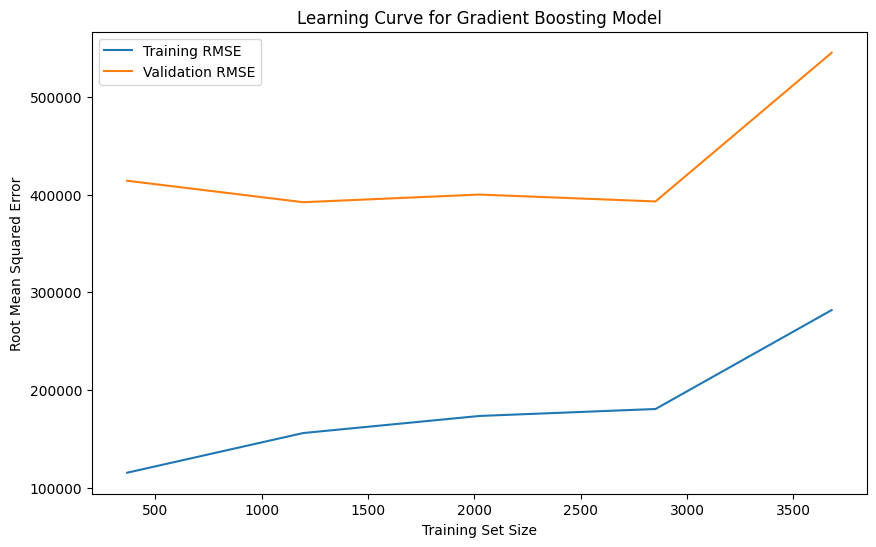

Linear Regression Predicted Price for the New House: 331038.9687692785
Decision Tree Predicted Price for the New House: 395000.0
Random Forest Predicted Price for the New House: 464319.86692308
Gradient Boosting Predicted Price for the New House: 453434.8315918732


C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from scipy import stats

# Read the dataset
df = pd.read_csv('dddd.csv')

# Extract relevant columns
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify feature names
feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']
X_train.columns = feature_names
X_test.columns = feature_names

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate models
models = [linear_model, tree_model, rf_model, gb_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    mse = mean_squared_error(y_test, model.predict(X_test))
    r2 = r2_score(y_test, model.predict(X_test))
    print(f"{name} - Mean Squared Error: {mse}, R-squared: {r2}")

# Scatter plot for visualizing predictions against actual prices
plt.figure(figsize=(12, 8))

for model, name in zip(models, model_names):
    plt.scatter(y_test, model.predict(X_test), label=name)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices for Different Models')
plt.legend()
plt.show()

# Histograms for comparing the distribution of actual prices and predicted prices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_test, bins=30, kde=True, color='blue')
plt.title('Distribution of Actual Prices')
plt.xlabel('Prices')

plt.subplot(1, 2, 2)
for model, name in zip(models, model_names):
    sns.histplot(model.predict(X_test), bins=30, kde=True, label=name)

plt.title('Distribution of Predicted Prices')
plt.xlabel('Prices')
plt.legend()
plt.show()

# Bar plot to visualize feature importance for the Random Forest model
feature_importance_rf = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_names, orient='h')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# Residual plots for each model
plt.figure(figsize=(12, 8))

for model, name in zip(models, model_names):
    residuals = y_test - model.predict(X_test)
    plt.scatter(model.predict(X_test), residuals, label=name)

plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals for Different Models')
plt.legend()
plt.show()




# Learning curve for the Gradient Boosting model
train_sizes, train_scores, test_scores = learning_curve(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse.mean(axis=1), label='Training RMSE')
plt.plot(train_sizes, test_rmse.mean(axis=1), label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('Root Mean Squared Error')
plt.title('Learning Curve for Gradient Boosting Model')
plt.legend()
plt.show()

# Features of the new house
new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3]]

# Predict using all models for the new house
for model, name in zip(models, model_names):
    predicted_price = model.predict(new_data)
    print(f"{name} Predicted Price for the New House: {predicted_price[0]}")
